<a href="https://colab.research.google.com/github/sultanbst123/Zindi_Africa-Expresso-Churn-Prediction/blob/main/Churn_espresso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis with Python

## Library & File

In [ ]:
!pip install mplcyberpunk 
!pip install wordcloud

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import *
import matplotlib as mpl 

from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt 
import mplcyberpunk 
%matplotlib inline

pd.set_option("display.max_columns", 100) 
pd.set_option("display.max_rows", 100) 
plt.style.use("cyberpunk") 
import warnings
warnings.filterwarnings("ignore")

In [ ]:
mpl.rcParams["font.style"] = "italic"
mpl.rcParams["font.weight"] = "bold"
mpl.rcParams["axes.linewidth"] = 1.5
mpl.rcParams["figure.dpi"] = 150
mpl.rcParams["axes.titlesize"] = 20
mpl.rcParams["axes.labelsize"] = 15
mpl.rcParams["axes.titleweight"] = "bold"
mpl.rcParams["axes.titlelocation"] = "left"
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.labelpad"] = 5
mpl.rcParams["axes.titlepad"] = 20
mpl.rcParams['axes.labelcolor'] = "white"
mpl.rcParams['axes.edgecolor'] = "white"
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['xtick.color'] = "white"
mpl.rcParams['ytick.color'] = "white"
mpl.rcParams["boxplot.boxprops.color"] = "white"
mpl.rcParams["boxplot.whiskerprops.color"] = "white"
mpl.rcParams["boxplot.capprops.color"] = "white"
mpl.rcParams["boxplot.flierprops.markerfacecolor"] =  "white"

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Churn espresso/Train.csv")
test = pd.read_csv("/content/drive/MyDrive/Churn espresso/Test.csv")
sub = pd.read_csv("/content/drive/MyDrive/Churn espresso/SampleSubmission.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [ ]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [ ]:

# drop id 
for i in [train, test]: 
    i.drop("user_id", axis=1, inplace=True)

In [ ]:
train.sample(7)

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
1553811,DAKAR,K > 24 month,6000.0,2.0,7599.0,2533.0,5.0,11333.0,161.0,75.0,20.0,NaN,NaN,NO,51,MIXT: 200mnoff net _unl on net _5Go;30d,1.0,0
1577073,DAKAR,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
296602,NaN,K > 24 month,500.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,7,NaN,NaN,1
1145734,LOUGA,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,8.0,NaN,NaN,NaN,NaN,NO,11,NaN,NaN,0
1937312,THIES,H 15-18 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,62,NaN,NaN,0
1910602,SAINT-LOUIS,K > 24 month,3000.0,9.0,3000.0,1000.0,9.0,1.0,1392.0,3.0,10.0,NaN,NaN,NO,52,On net 200F=Unlimited _call24H,5.0,0
1772681,KAOLACK,K > 24 month,17900.0,21.0,18400.0,6133.0,26.0,732.0,180.0,625.0,27.0,2.0,1.0,NO,57,All-net 500F=2000F;5d,18.0,0


In [ ]:
# check duplicated di data train

train.duplicated().sum()

644107

In [ ]:
# check nan 

pd.DataFrame({"train/null": (train.isnull().sum()/train.shape[0]) *100, 
              "test/null": (test.isnull().sum()/test.shape[0]) *100}).sort_values("train/null", ascending=False)

,train/null,test/null
ZONE2,93.648052,93.666327
ZONE1,92.120835,92.144468
TIGO,59.887988,59.717147
DATA_VOLUME,49.229776,49.204608
TOP_PACK,41.902223,41.769987
FREQ_TOP_PACK,41.902223,41.769987
ORANGE,41.561191,41.362492
REGION,39.428044,39.388941
ON_NET,36.520774,36.438874
MONTANT,35.131018,35.002775


## definisi semua variable

In [ ]:
var = pd.read_csv("/content/drive/MyDrive/Churn espresso/VariableDefinitions.csv")

In [ ]:
vr = var["Variable Definitions"] +" = "+ var["Unnamed: 2"]
vr.to_list()

[nan,
 nan,
 nan,
 'REGION = the location of each client',
 'TENURE = duration in the network',
 'MONTANT = top-up amount',
 'FREQUENCE_RECH = \xa0number of times the customer refilled',
 'REVENUE = monthly income of each client',
 'ARPU_SEGMENT = income over 90 days / 3',
 'FREQUENCE = number of times the client has made an income',
 'DATA_VOLUME = number of connections',
 'ON_NET = inter expresso call',
 'ORANGE = call to orange',
 'TIGO = call to Tigo',
 'ZONE1 = call to zones1',
 'ZONE2 = call to zones2',
 'MRG = a client who is going',
 'REGULARITY = number of times the client is active for 90 days',
 'TOP_PACK = the most active packs',
 'FREQ_TOP_PACK = number of times the client has activated the top pack packages',
 'CHURN = variable to predict - Target']

## Target(churn)

,CHURN
0,0.812453
1,0.187547


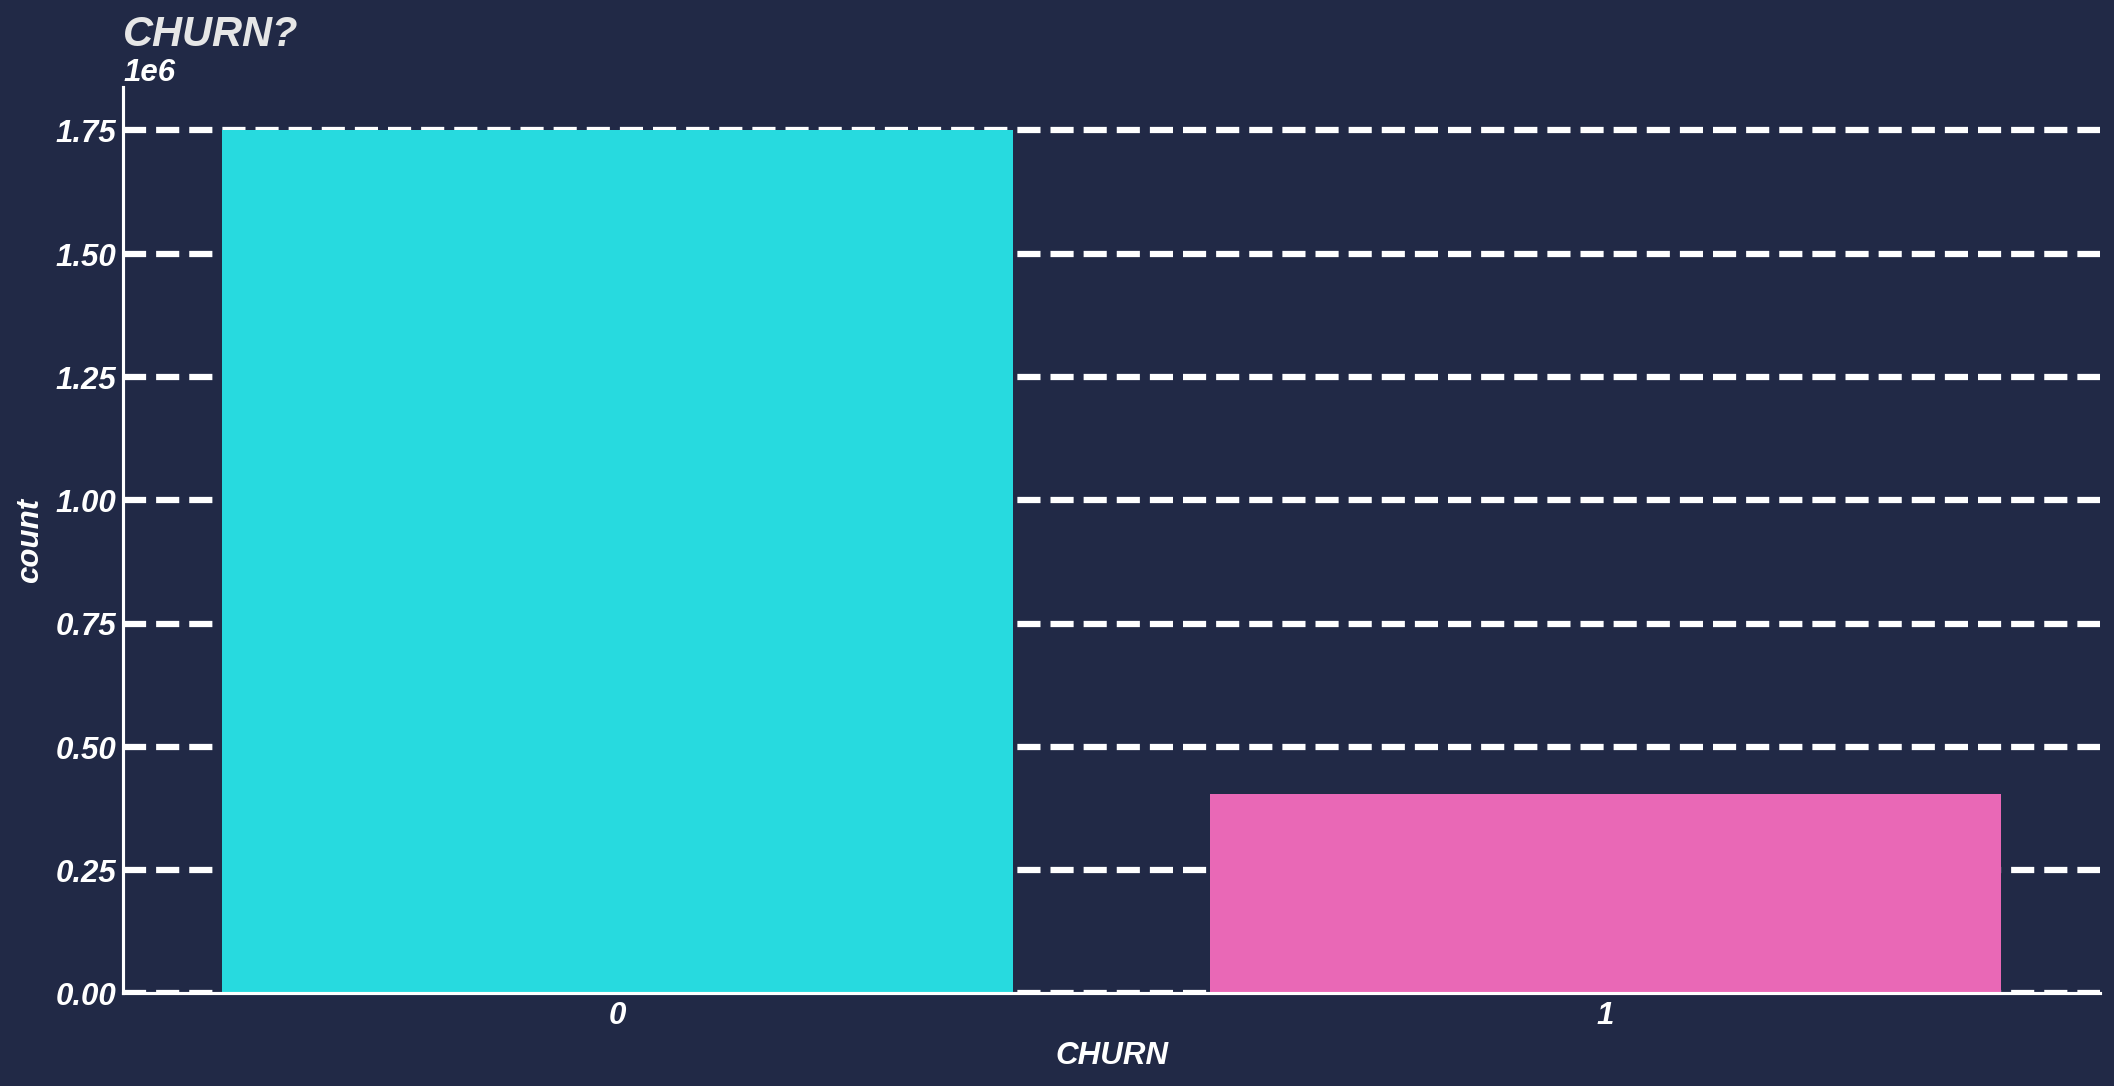

In [ ]:
plt.figure(figsize=(17, 8)) 

sns.countplot(train.CHURN)
plt.grid(axis="y", linewidth=3, linestyle="--", color="white") 
plt.title("CHURN?")

train.CHURN.value_counts(dropna=False, normalize=True).to_frame()

# 1 == yes 
# 0 == no

## Category & Numeric

In [ ]:
cater = train.select_dtypes("object").columns
number = train.select_dtypes("number").columns

### Category features

In [ ]:
# descriptive analysis

train[cater].describe()

,REGION,TENURE,MRG,TOP_PACK
count,1304749,2154048,2154048,1251454
unique,14,8,1,140
top,DAKAR,K > 24 month,NO,All-net 500F=2000F;5d
freq,513271,2043201,2154048,317802


In [ ]:
# drop mrg karena low frequency

for i in [train, test]: 
    i.drop("MRG", axis=1, inplace=True)

In [ ]:
cater = cater.to_list()
cater.remove("MRG")

In [ ]:
train[cater].head()

,user_id,REGION,TENURE,TOP_PACK
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,On net 200F=Unlimited _call24H
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,On-net 1000F=10MilF;10d
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,"Data:1000F=5GB,7d"
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,Mixt 250F=Unlimited_call24H


#### region

In [ ]:
train.REGION.value_counts(dropna=False).to_frame()

,REGION
NaN,849299
DAKAR,513271
THIES,180052
SAINT-LOUIS,119886
LOUGA,99053
KAOLACK,96986
DIOURBEL,66911
TAMBACOUNDA,55074
KAFFRINE,43963
KOLDA,38743


Text(0.0, 1.0, 'REGION')

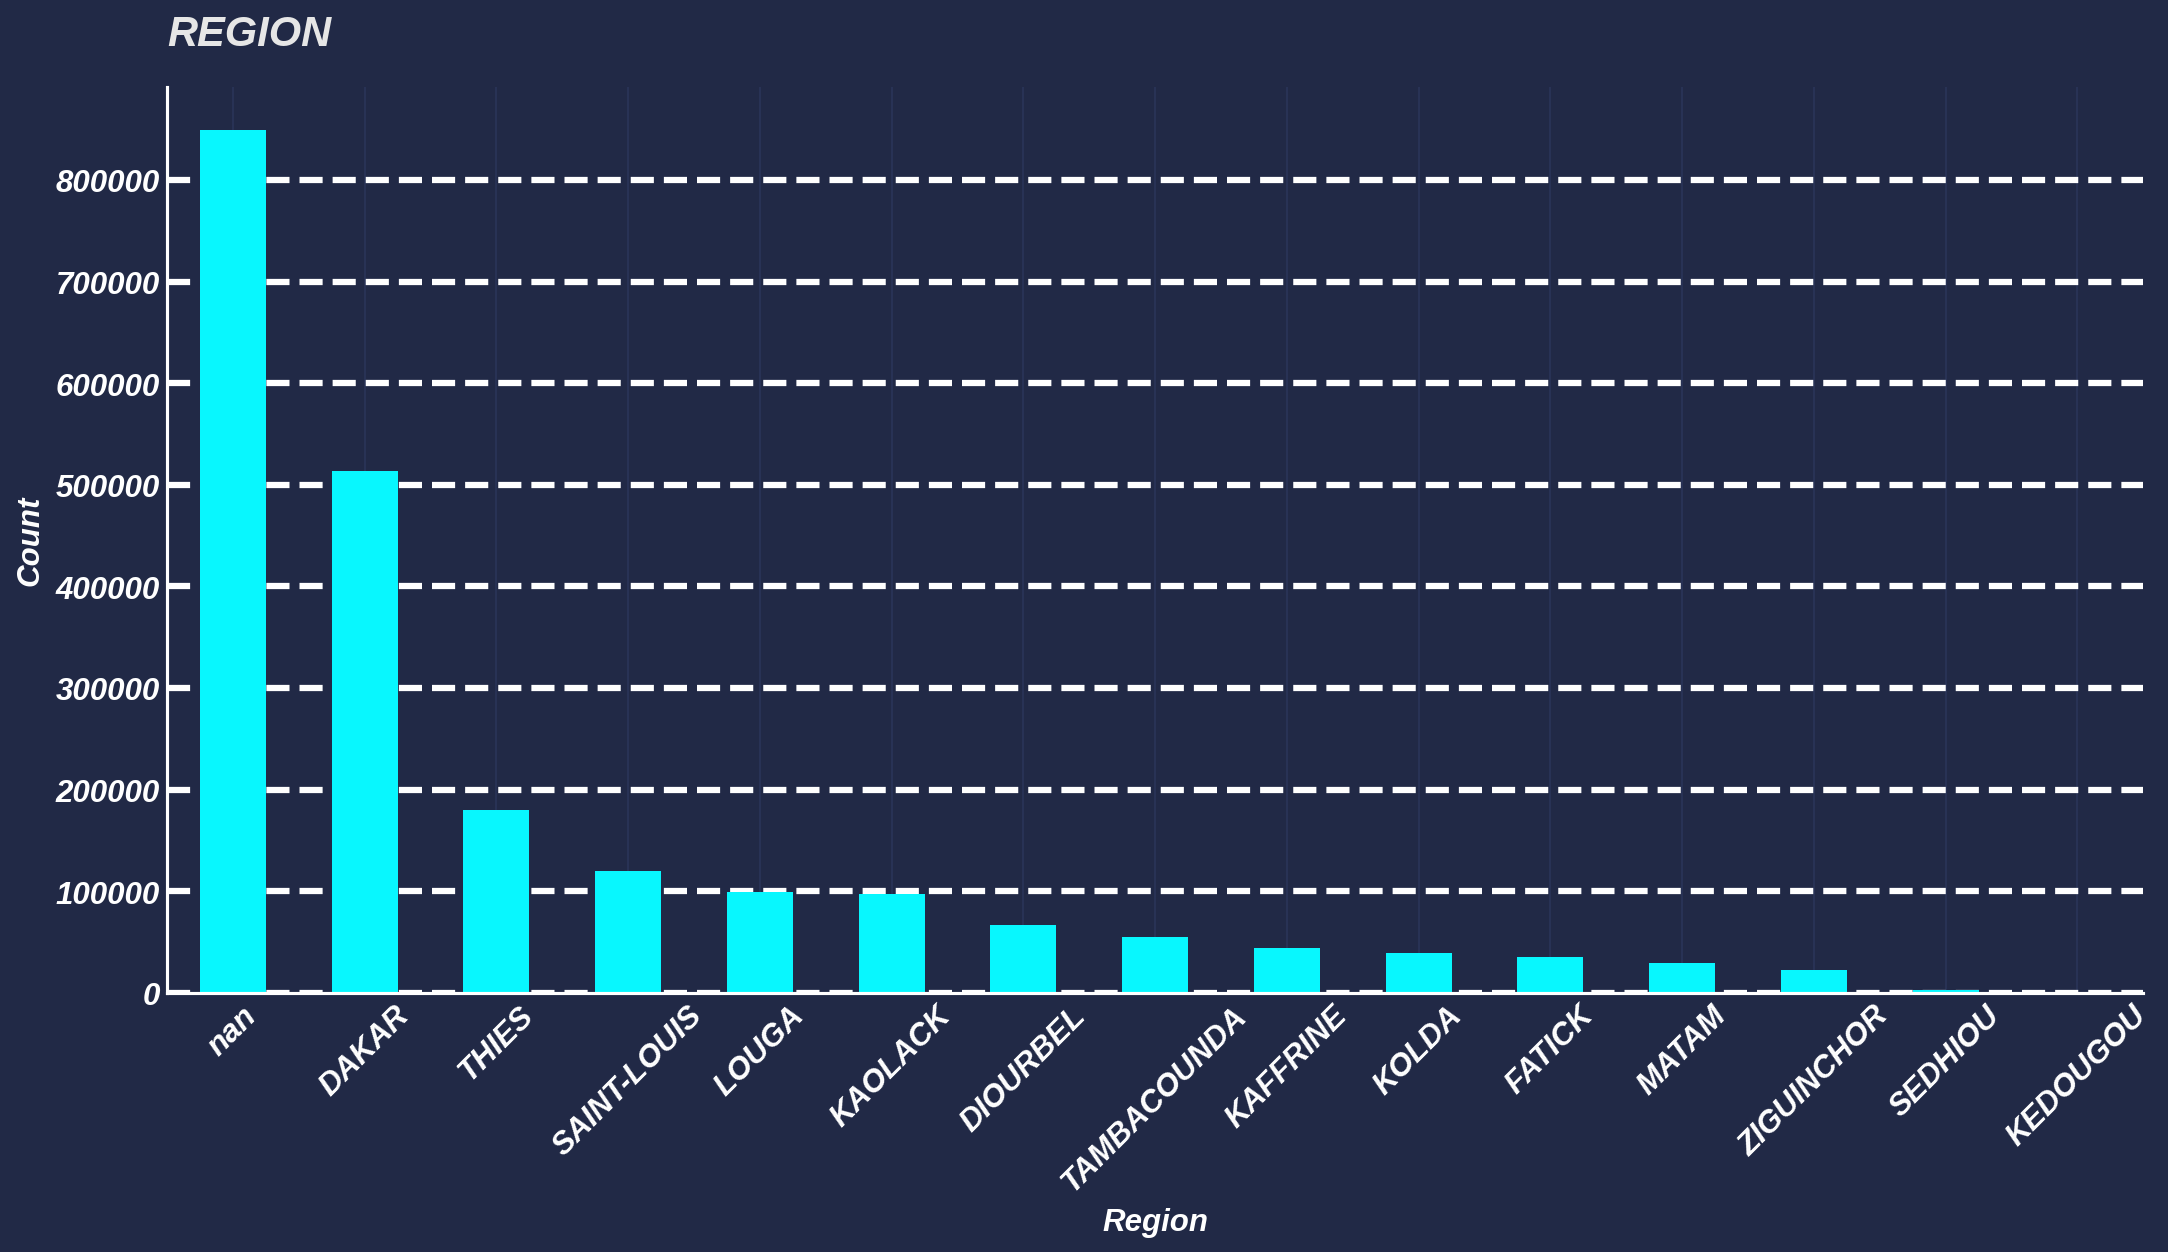

In [ ]:

train.REGION.value_counts(dropna=False).plot(kind="bar", figsize=(17, 8)) 
plt.grid(axis="y", linewidth=3, linestyle="--", color="white")
plt.xlabel("Region")
plt.xticks(rotation = 45) 
plt.ylabel("Count") 
plt.title("REGION")

In [ ]:
# fillna region with None 

for i in [train, test]: 
    i["REGION"].fillna("None", inplace=True)

In [ ]:

# after fill with none 
train.REGION.value_counts(dropna=False).to_frame()

,REGION
None,849299
DAKAR,513271
THIES,180052
SAINT-LOUIS,119886
LOUGA,99053
KAOLACK,96986
DIOURBEL,66911
TAMBACOUNDA,55074
KAFFRINE,43963
KOLDA,38743


In [ ]:

# rata rata churn di setiap region 

train.groupby("REGION")["CHURN"].mean().to_frame().sort_values("CHURN", ascending=False).style.bar("CHURN", color="green")

,CHURN
REGION,
None,0.447987
SEDHIOU,0.043604
KEDOUGOU,0.042157
DIOURBEL,0.028097
ZIGUINCHOR,0.027432
KAOLACK,0.023436
MATAM,0.020080
DAKAR,0.019235
THIES,0.016301


#### tenure

In [ ]:
train.TENURE.value_counts(dropna=False).to_frame()

,TENURE
K > 24 month,2043201
I 18-21 month,45278
H 15-18 month,26006
G 12-15 month,14901
J 21-24 month,12725
F 9-12 month,9328
E 6-9 month,1839
D 3-6 month,770


Text(0.0, 1.0, 'Tenure')

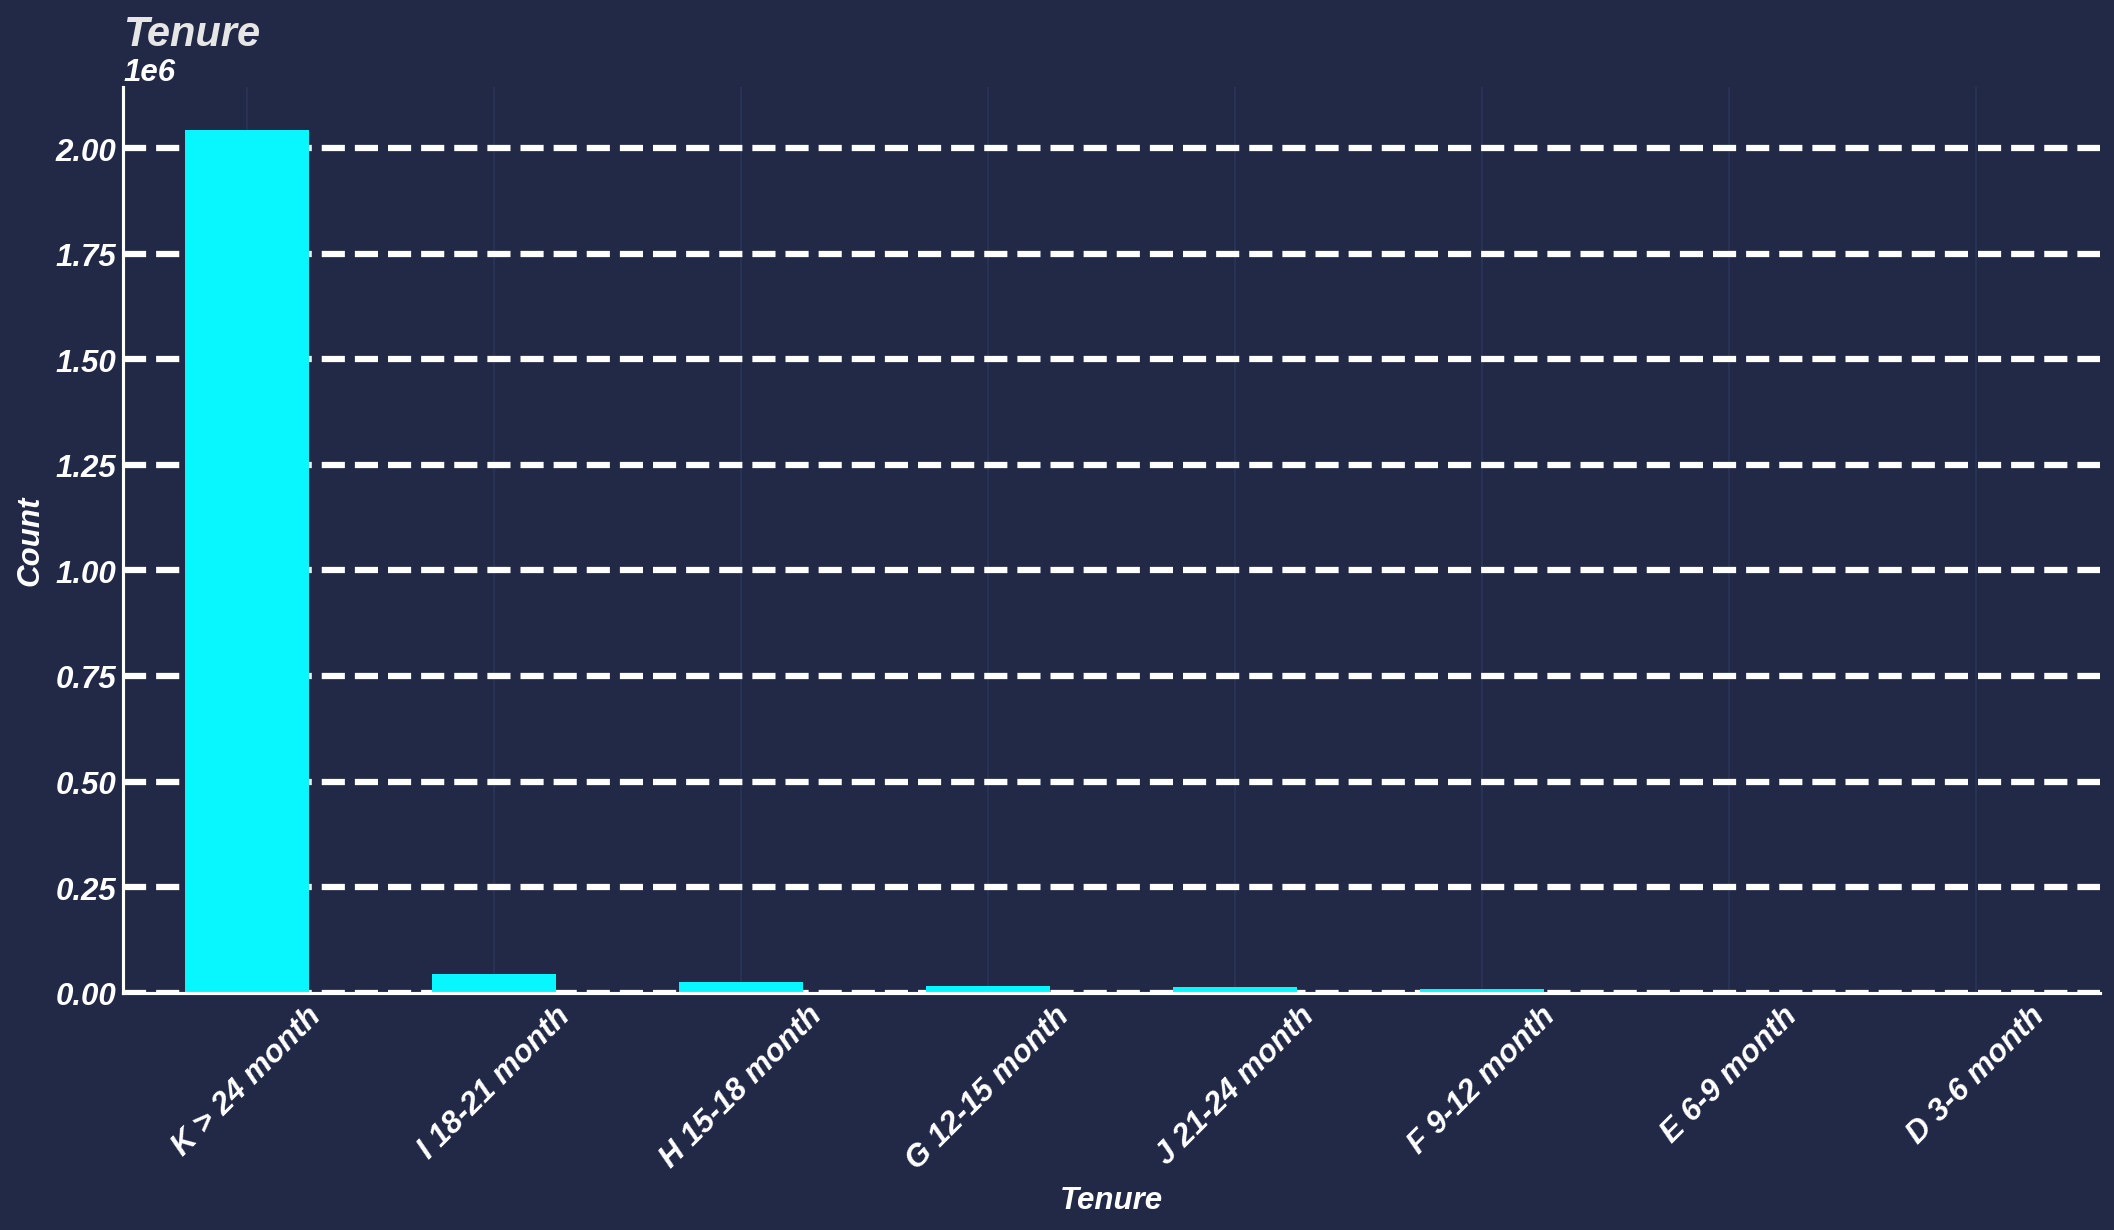

In [ ]:

train.TENURE.value_counts(dropna=False).plot(kind="bar", figsize=(17, 8)) 
plt.grid(axis="y", linewidth=3, linestyle="--", color="white")
plt.xlabel("Tenure")
plt.xticks(rotation = 45) 
plt.ylabel("Count") 
plt.title("Tenure")

In [ ]:

# rata rata tenure di setiap region 

train.groupby("TENURE")["CHURN"].mean().to_frame().sort_values("CHURN", ascending=False).style.bar("CHURN", color="green")

,CHURN
TENURE,
G 12-15 month,0.316287
I 18-21 month,0.272693
H 15-18 month,0.266246
F 9-12 month,0.240137
J 21-24 month,0.230884
K > 24 month,0.183236
E 6-9 month,0.171833
D 3-6 month,0.154545


#### top pack

In [ ]:
train.TOP_PACK.value_counts(dropna=False)

NaN                               902594
All-net 500F=2000F;5d             317802
On net 200F=Unlimited _call24H    152295
Data:490F=1GB,7d                  115180
Data: 100 F=40MB,24H               84649
                                   ...  
ESN_POSTPAID_CLASSIC_RENT              1
Data:OneTime_Pilot_1.5GB               1
FIFA_TS_weekly                         1
FIFA_TS_monthly                        1
301765007                              1
Name: TOP_PACK, Length: 141, dtype: int64

In [ ]:
train.TOP_PACK.unique()

array(['On net 200F=Unlimited _call24H', nan, 'On-net 1000F=10MilF;10d',
       'Data:1000F=5GB,7d', 'Mixt 250F=Unlimited_call24H',
       'MIXT:500F= 2500F on net _2500F off net;2d',
       'All-net 500F=2000F;5d', 'On-net 500F_FNF;3d',
       'Data: 100 F=40MB,24H', 'MIXT: 200mnoff net _unl on net _5Go;30d',
       'Jokko_Daily', 'Data: 200 F=100MB,24H', 'Data:490F=1GB,7d',
       'Twter_U2opia_Daily', 'On-net 500=4000,10d', 'Data:1000F=2GB,30d',
       'IVR Echat_Daily_50F', 'Pilot_Youth4_490',
       'All-net 500F =2000F_AllNet_Unlimited', 'Twter_U2opia_Weekly',
       'Data:200F=Unlimited,24H', 'On-net 200F=60mn;1d',
       'All-net 600F= 3000F ;5d', 'Pilot_Youth1_290',
       'All-net 1000F=(3000F On+3000F Off);5d', 'VAS(IVR_Radio_Daily)',
       'Data:3000F=10GB,30d', 'All-net 1000=5000;5d',
       'Twter_U2opia_Monthly', 'MIXT: 390F=04HOn-net_400SMS_400 Mo;4h\t',
       'FNF2 ( JAPPANTE)', 'Yewouleen_PKG', 'Data:150F=SPPackage1,24H',
       'WIFI_Family_2MBPS', 'Data:500F=2GB,2

In [ ]:

# coba buat feature baru 
# filter yang punya paket dan tidak
paket = np.where(train.TOP_PACK.isnull(), 0, 1)

In [ ]:
np.unique(paket, return_counts = True)

#output 
# 0 == tidak punya 
# 1 == punya

(array([0, 1]), array([ 902594, 1251454]))

In [ ]:
train.groupby(paket)["CHURN"].mean().to_frame()

,CHURN
0,0.391899
1,0.040161


In [ ]:
# isi dengan none 

for i in [train, test]: 
    i["TOP_PACK"].fillna("None", inplace=True)

### Numeric features

In [ ]:
number = number.to_list()

In [ ]:
number.remove("CHURN")

In [ ]:
train[number].head()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
0,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,54,8.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
2,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,17,1.0
3,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,62,11.0
4,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,11,2.0


In [ ]:
train[number].describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK
count,1.397309e+06,1.397309e+06,1.428000e+06,1.428000e+06,1.428000e+06,1.093615e+06,1.367373e+06,1.258800e+06,864032.000000,169721.000000,136824.000000,2.154048e+06,1.251454e+06
mean,5.532117e+03,1.152912e+01,5.510810e+03,1.836943e+03,1.397814e+01,3.366450e+03,2.776891e+02,9.541871e+01,23.109253,8.170132,7.553309,2.804251e+01,9.272461e+00
std,7.111339e+03,1.327407e+01,7.187113e+03,2.395700e+03,1.469403e+01,1.330446e+04,8.726889e+02,2.049873e+02,63.578086,41.169511,33.487234,2.228686e+01,1.228044e+01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000,0.000000,0.000000,6.000000e+00,2.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,6.000000,1.000000,2.000000,2.400000e+01,5.000000e+00
75%,7.350000e+03,1.600000e+01,7.368000e+03,2.456000e+03,2.000000e+01,2.895000e+03,1.560000e+02,9.900000e+01,20.000000,3.000000,5.000000,5.100000e+01,1.200000e+01
max,4.700000e+05,1.330000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4174.000000,4792.000000,3697.000000,6.200000e+01,7.130000e+02


Text(0.0, 1.0, 'Correlation of numeric features')

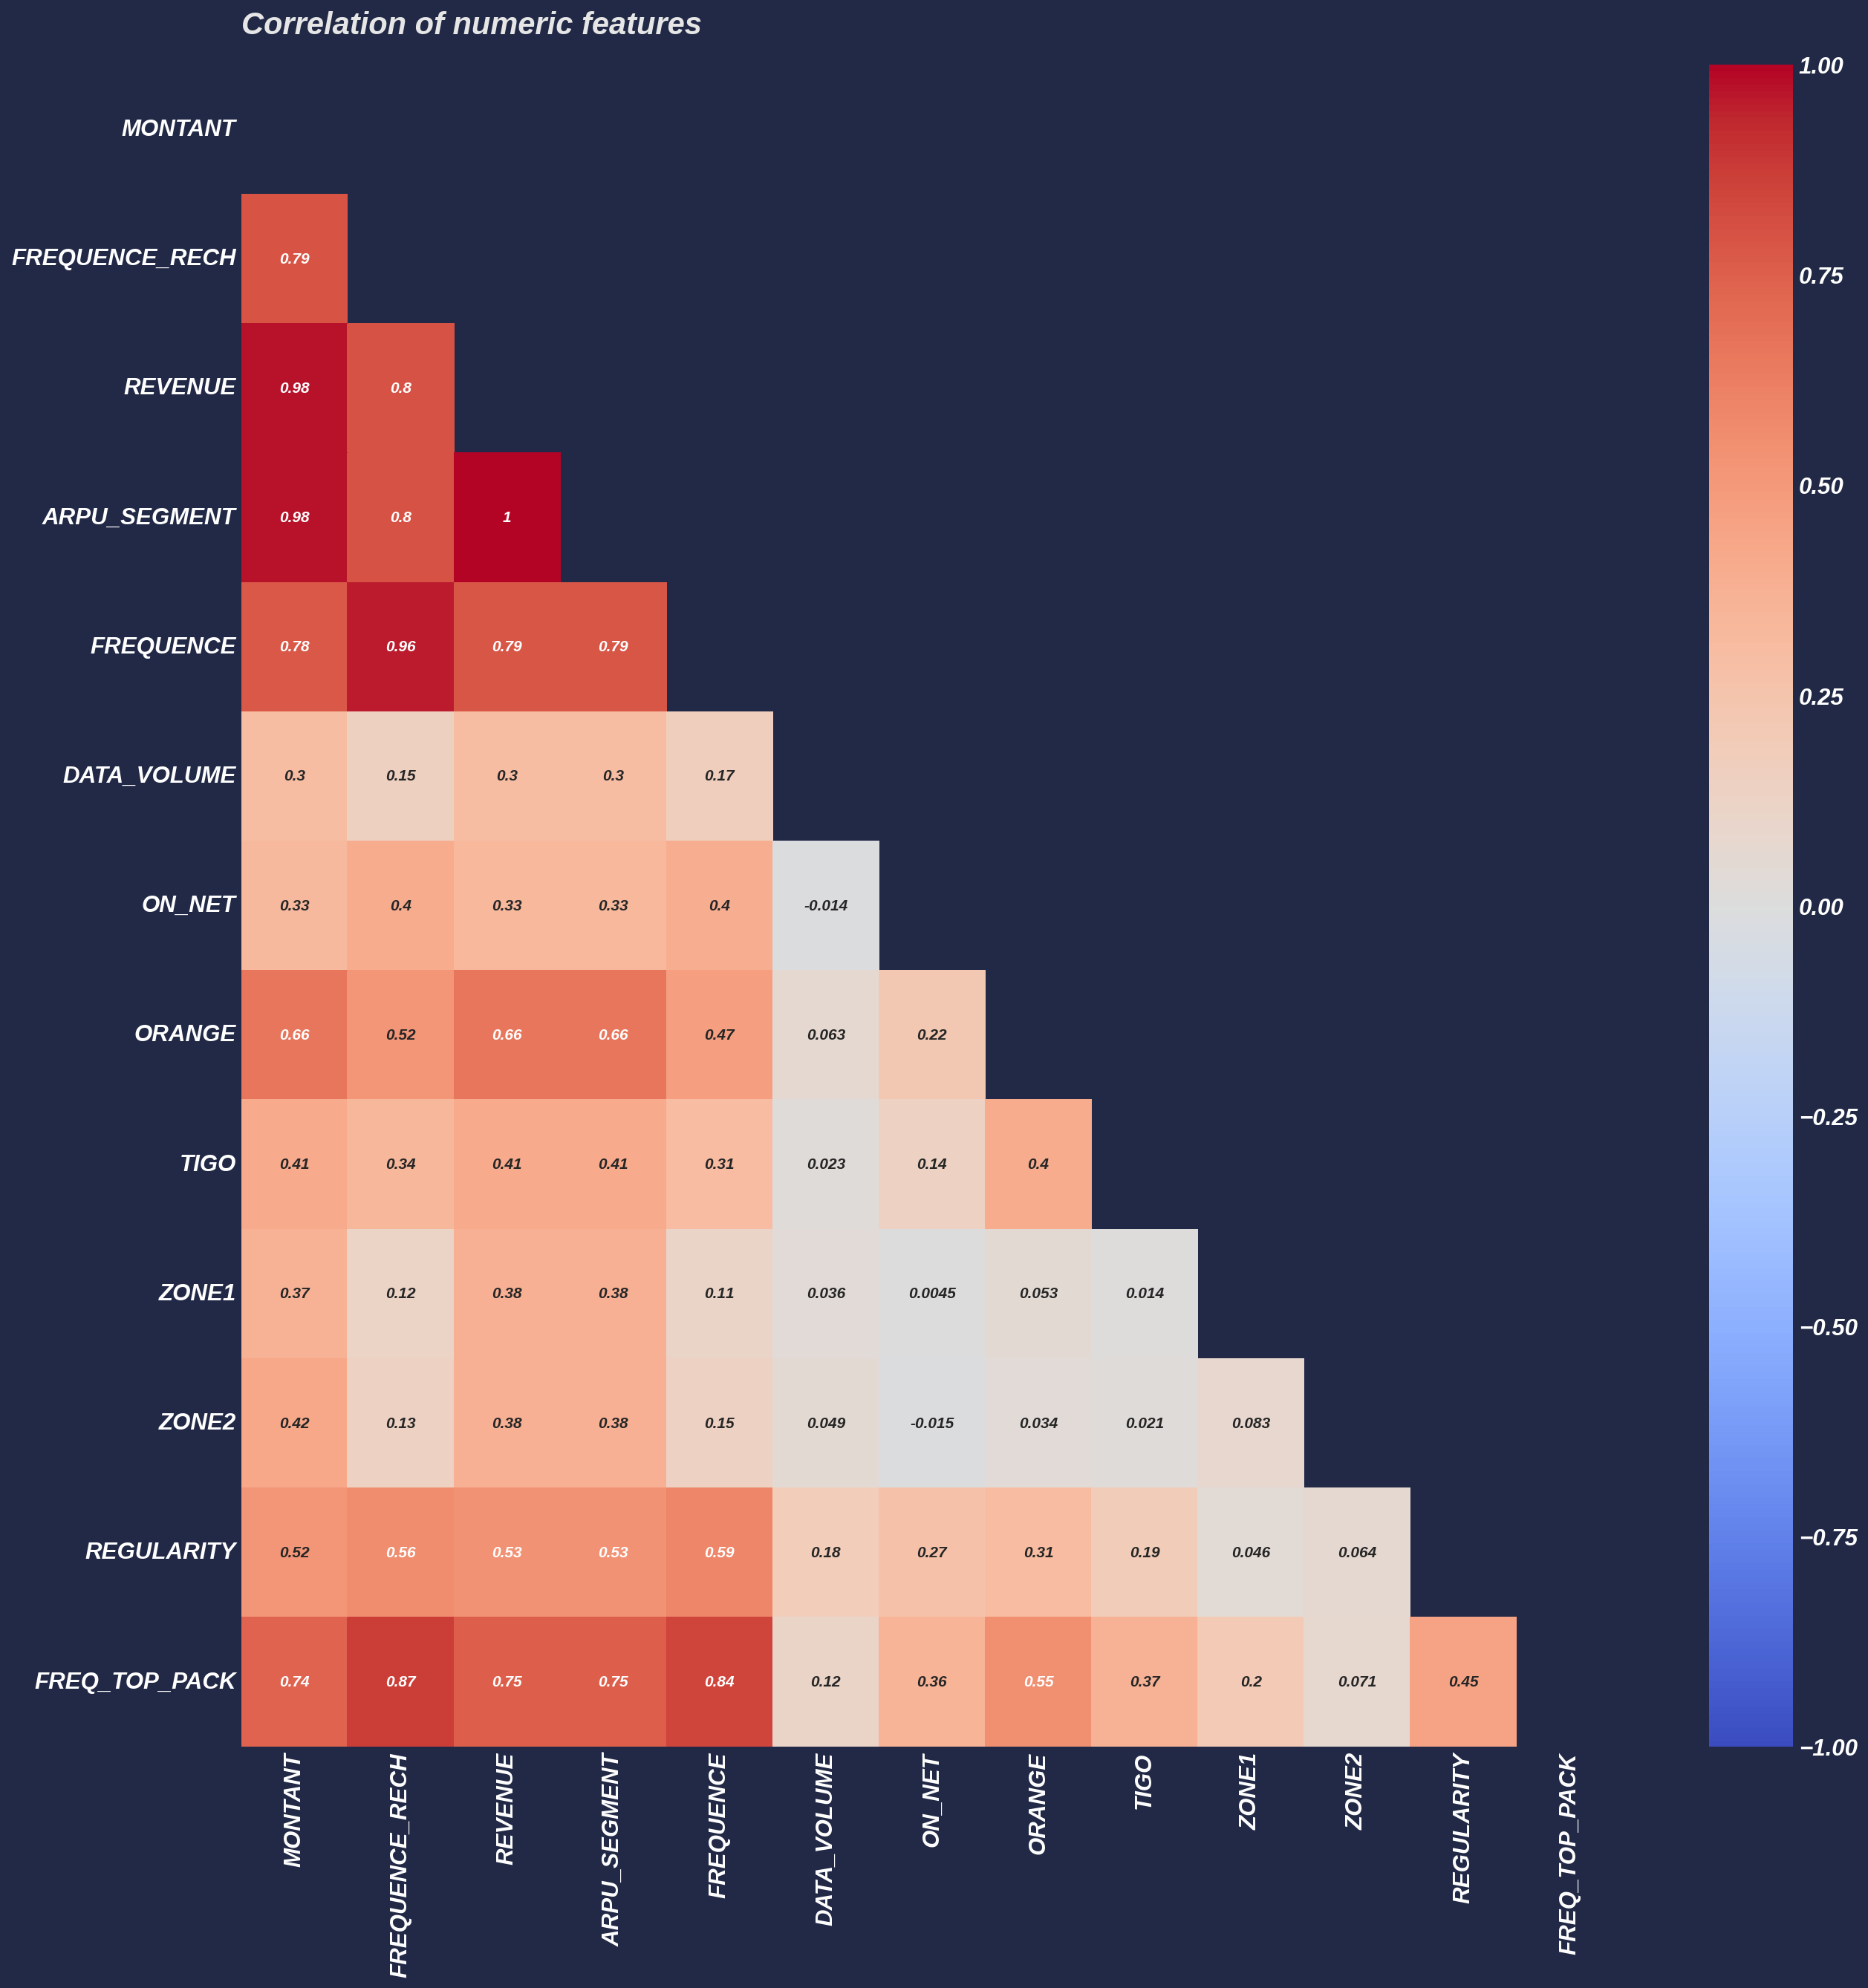

In [ ]:
# check correlation di feature numeric

mask = np.triu(train[number].corr())

plt.figure(figsize=(20,20)) 
sns.heatmap(train[number].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap="coolwarm") 
plt.title("Correlation of numeric features")

In [ ]:
# semua nya high correlation/ multicollinearity

In [ ]:
# setelah berpikir melihat data numeric, isi dengan nilai min() 

for i in [train, test]: 
    i[number] = i[number].fillna(i[number].min())

# Data modelling with Python

In [ ]:

!pip install catboost
!pip install optuna
!pip install borutashap

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
import optuna
from BorutaShap import BorutaShap
 
# classification
import lightgbm, catboost
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# regression
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

#preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,f1_score, 
                            log_loss, roc_auc_score, plot_roc_curve,plot_confusion_matrix) 
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.calibration import CalibrationDisplay

In [ ]:
train.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,54,On net 200F=Unlimited _call24H,8.0,0
1,None,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,None,NaN,1
2,None,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,17,On-net 1000F=10MilF;10d,1.0,0
3,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,62,"Data:1000F=5GB,7d",11.0,0
4,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,11,Mixt 250F=Unlimited_call24H,2.0,0


## Split

In [ ]:
x = train.drop("CHURN", axis=1) 
y = train.CHURN

In [ ]:
# ubah ke type category
cater = x.select_dtypes("object").columns

In [ ]:
x[cater] = x[cater].astype("category")

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, stratify =y, random_state=42)

In [ ]:
x_train.shape, x_val.shape

((1723238, 16), (430810, 16))

In [ ]:
# coba dengan lgbm

In [ ]:
lg = LGBMClassifier(random_state=42)
lg.fit(x_train, y_train)

LGBMClassifier(random_state=42)

In [ ]:
proba = lg.predict_proba(x_val)[:,-1]

In [ ]:

# ROC auc score 

roc_auc_score(y_val, proba)

0.9313904987011326

In [ ]:
print(f"accuracy train: {lg.score(x_train, y_train)}") 
print(f"accuracy val: {lg.score(x_val, y_val)}")

accuracy train: 0.8798970310543291
accuracy val: 0.8798565492908706


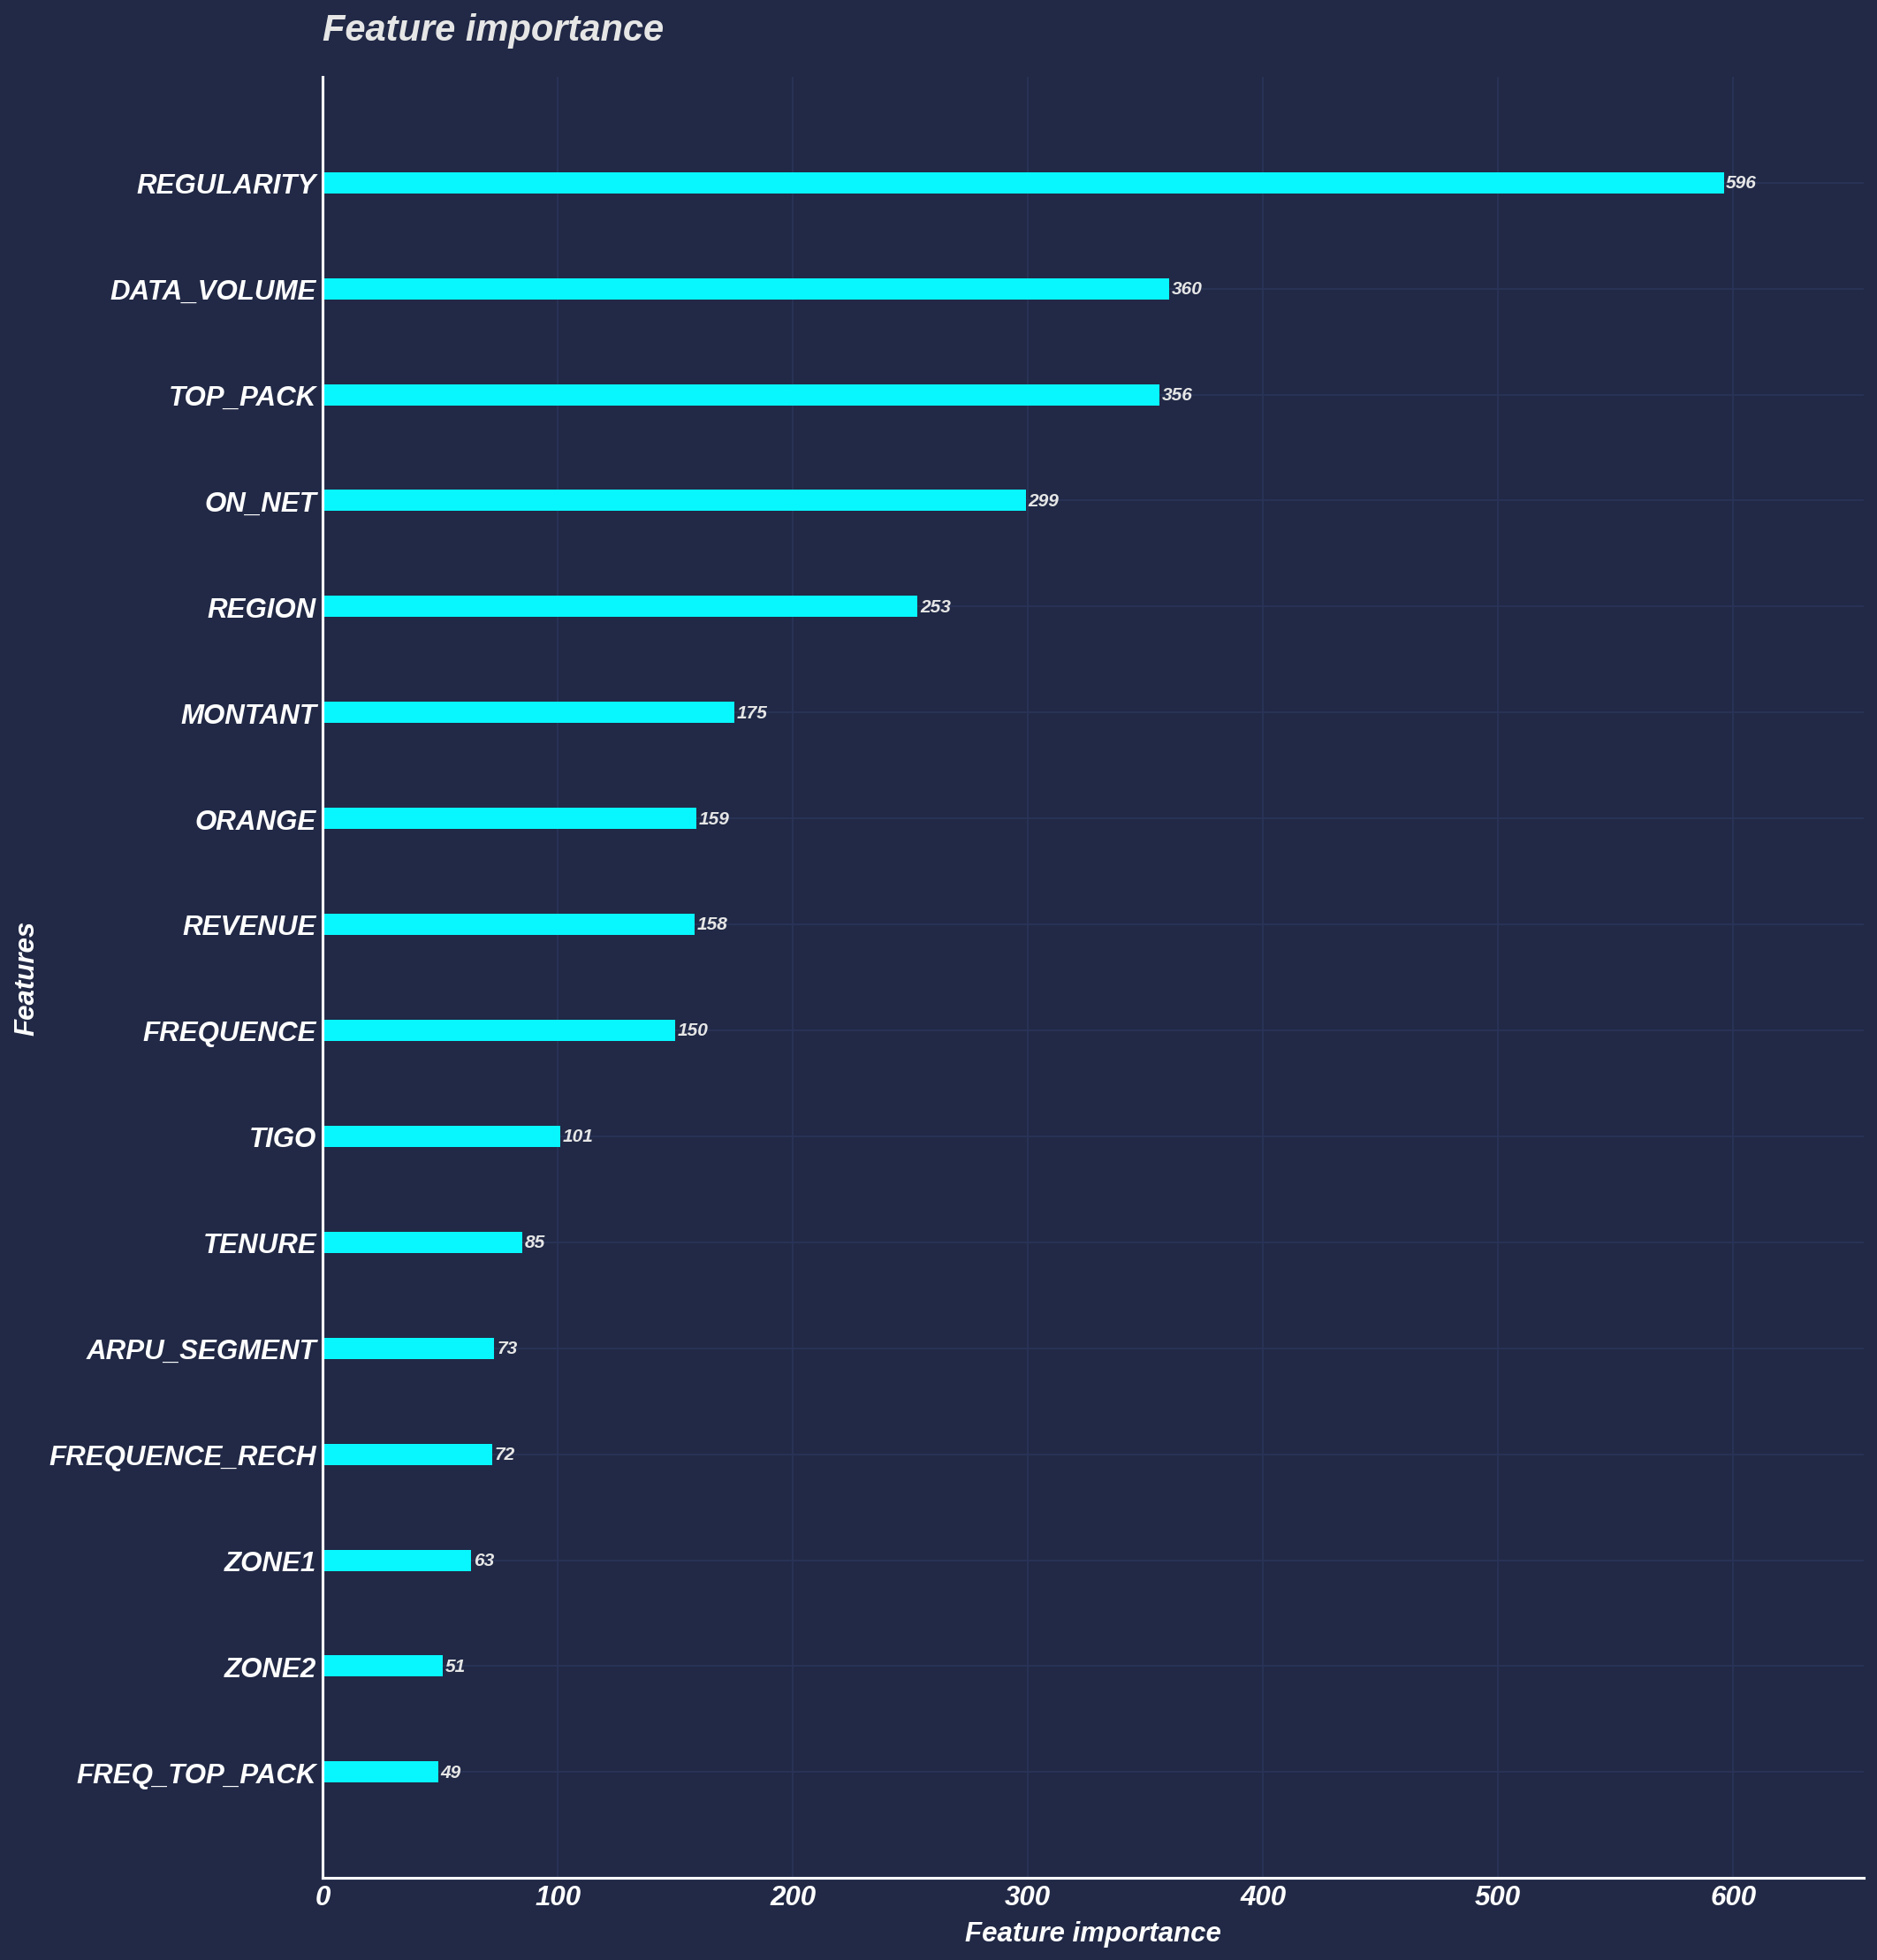

In [ ]:
# feature important
fig, ax = plt.subplots(1, 1,figsize=(15,18)) 
lightgbm.plot_importance(lg, ax=ax)

In [ ]:
#coba dengan catboost + GPU

In [ ]:
cb = CatBoostClassifier(random_state=42,task_type="GPU")
cb.fit(x_train, y_train,cat_features=cater.to_list())

Learning rate set to 0.022376
0:	learn: 0.6559259	total: 248ms	remaining: 4m 7s
1:	learn: 0.6228316	total: 479ms	remaining: 3m 58s
2:	learn: 0.5921413	total: 696ms	remaining: 3m 51s
3:	learn: 0.5638210	total: 906ms	remaining: 3m 45s
4:	learn: 0.5384540	total: 1.11s	remaining: 3m 41s
5:	learn: 0.5151517	total: 1.31s	remaining: 3m 37s
6:	learn: 0.4925558	total: 1.52s	remaining: 3m 36s
7:	learn: 0.4732454	total: 1.72s	remaining: 3m 33s
8:	learn: 0.4558524	total: 1.92s	remaining: 3m 31s
9:	learn: 0.4397775	total: 2.14s	remaining: 3m 31s
10:	learn: 0.4253172	total: 2.34s	remaining: 3m 30s
11:	learn: 0.4121519	total: 2.55s	remaining: 3m 29s
12:	learn: 0.4002040	total: 2.76s	remaining: 3m 29s
13:	learn: 0.3892823	total: 2.97s	remaining: 3m 29s
14:	learn: 0.3794103	total: 3.17s	remaining: 3m 28s
15:	learn: 0.3703121	total: 3.38s	remaining: 3m 27s
16:	learn: 0.3619766	total: 3.59s	remaining: 3m 27s
17:	learn: 0.3544094	total: 3.79s	remaining: 3m 26s
18:	learn: 0.3474248	total: 3.99s	remaining: 

In [ ]:
proba = cb.predict_proba(x_val)

In [ ]:
roc_auc_score(y_val, proba[:,-1])

0.9314698522361876

In [ ]:
print(f"accuracy train: {cb.score(x_train, y_train)}") 
print(f"accuracy val: {cb.score(x_val, y_val)}")

accuracy train: 0.8800421067780538
accuracy val: 0.8799493976462942


## Cross validation

### LGBM

In [ ]:
# Cross validation for lgbm

def cross_val(X, y, model, params, folds=10):

    score_list = []
    
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold+1}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
        
        #fit
        alg = model(**params,random_state=2021)
        alg.fit(x_train,y_train,eval_set=[(x_test,y_test)],verbose=False,early_stopping_rounds=100)

        #predict validation
        pred = alg.predict_proba(x_test)[:,-1]
        score = roc_auc_score(y_test, pred)
        score_list.append(score)
        
        print(f" roc_auc_score: {score}")
        print("-"*50)
     
    print("\nmean roc_auc_score:",np.array(score_list).mean())

    return alg

In [ ]:
lg_params = {"n_estimators":10000}

In [ ]:
lg_score = cross_val(x, y, LGBMClassifier,lg_params)

Fold: 1
 roc_auc_score: 0.9317838759436263
--------------------------------------------------
Fold: 2
 roc_auc_score: 0.9310009422627061
--------------------------------------------------
Fold: 3
 roc_auc_score: 0.9323093122979078
--------------------------------------------------
Fold: 4
 roc_auc_score: 0.9320738172301501
--------------------------------------------------
Fold: 5
 roc_auc_score: 0.9299161582362705
--------------------------------------------------
Fold: 6
 roc_auc_score: 0.9319526906620036
--------------------------------------------------
Fold: 7
 roc_auc_score: 0.9309804011325099
--------------------------------------------------
Fold: 8
 roc_auc_score: 0.9314037217790062
--------------------------------------------------
Fold: 9
 roc_auc_score: 0.9308804587564254
--------------------------------------------------
Fold: 10
 roc_auc_score: 0.9309733444700914
--------------------------------------------------

mean roc_auc_score: 0.9313274722770697


In [ ]:
proba = lg_score.predict_proba(x_val)

In [ ]:
roc_auc_score(y_val, proba[:,-1])

0.9319564900305413

In [ ]:
print(f"train accuracy: {lg_score.score(x_train, y_train)}")
print(f"val accuracy: {lg_score.score(x_val, y_val)}")

train accuracy: 0.879771685629031
val accuracy: 0.8800051066595483


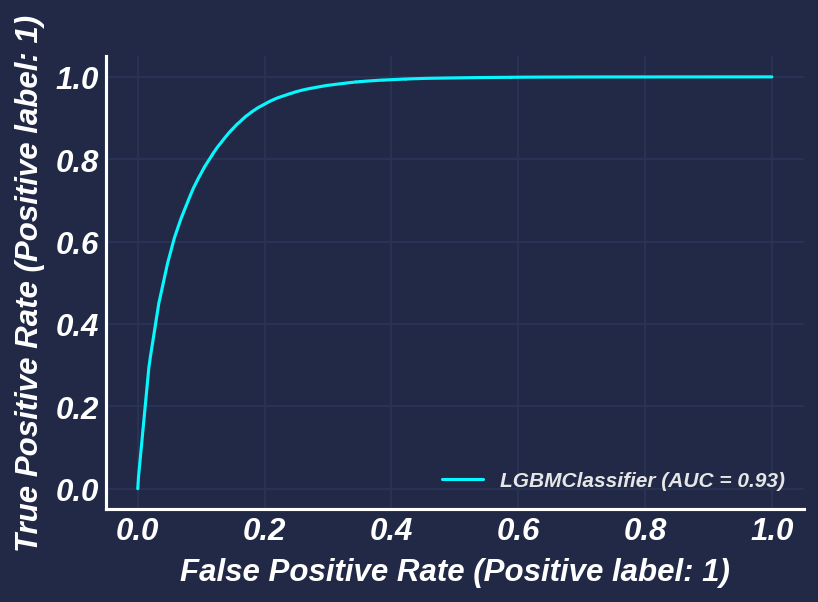

In [ ]:
plot_roc_curve(lg_score, x_val, y_val)

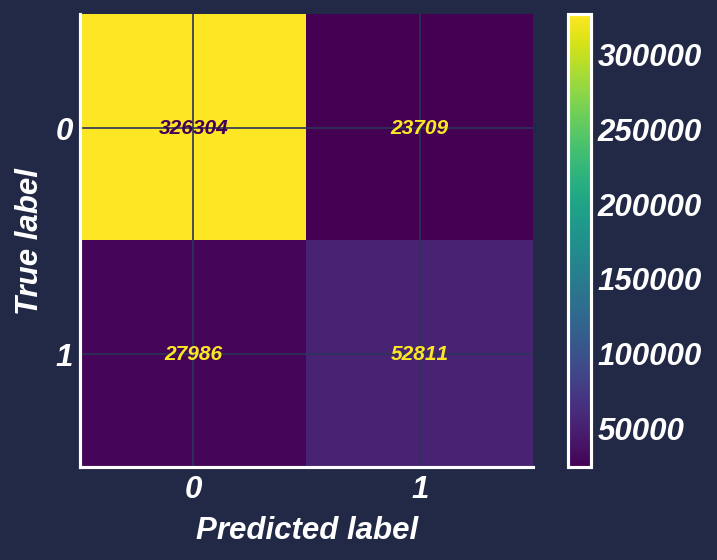

In [ ]:
plot_confusion_matrix(lg_score, x_val, y_val)

### Catboost + GPU

In [ ]:
# Cross validation for catboost

def cross_val(X, y, model, params, folds=10):

    score_list = []
    
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold+1}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]
        
        #fit
        alg = model(**params,random_state=2021)
        alg.fit(x_train,y_train,eval_set=[(x_test,y_test)],verbose=False,cat_features = cater.to_list(), early_stopping_rounds=100)

        #predict validation
        pred = alg.predict_proba(x_test)[:,-1]
        score = roc_auc_score(y_test, pred)
        score_list.append(score)
        
        print(f" roc_auc_score: {score}")
        print("-"*50)
     
    print("\nmean roc_auc_score:",np.array(score_list).mean())

    return alg

In [ ]:
cb_params = {"task_type": "GPU"}

In [ ]:
cb_score = cross_val(x, y, CatBoostClassifier, cb_params)

Fold: 1


Custom logger is already specified. Specify more than one logger at same time is not thread safe.

 roc_auc_score: 0.9318657764393632
--------------------------------------------------
Fold: 2
 roc_auc_score: 0.9311716281852641
--------------------------------------------------
Fold: 3
 roc_auc_score: 0.9324254160709349
--------------------------------------------------
Fold: 4
 roc_auc_score: 0.9322335491587252
--------------------------------------------------
Fold: 5
 roc_auc_score: 0.9300231698753169
--------------------------------------------------
Fold: 6
 roc_auc_score: 0.9320880053551581
--------------------------------------------------
Fold: 7
 roc_auc_score: 0.9310973230024064
--------------------------------------------------
Fold: 8
 roc_auc_score: 0.9315364526919812
--------------------------------------------------
Fold: 9
 roc_auc_score: 0.9310219162136417
--------------------------------------------------
Fold: 10
 roc_auc_score: 0.9311448713383161
--------------------------------------------------

mean roc_auc_score: 0.9314608108331109


In [ ]:
prob = cb_score.predict_proba(x_val)

In [ ]:
roc_auc_score(y_val, prob[:, -1])

0.9320234770876777

In [ ]:
print(f"train accuracy: {cb_score.score(x_train, y_train)}")
print(f"val accuracy: {cb_score.score(x_val, y_val)}")

train accuracy: 0.8802504355173226
val accuracy: 0.8805111301966064


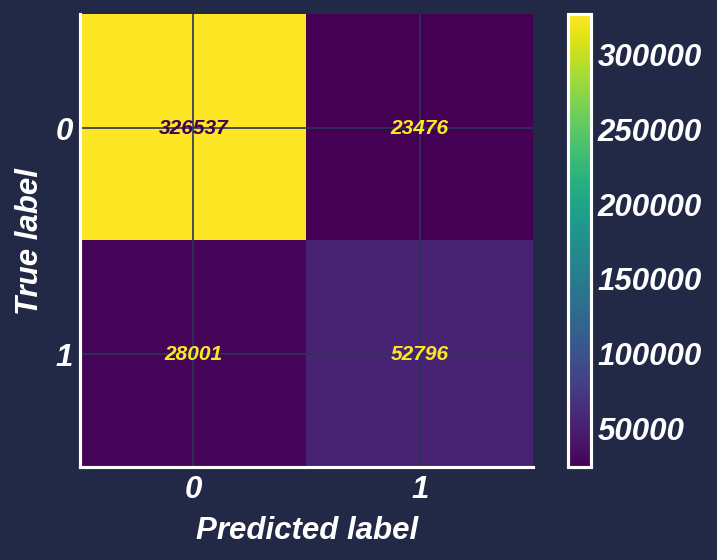

In [ ]:
# confusion matrix 

plot_confusion_matrix(cb_score, x_val, y_val)

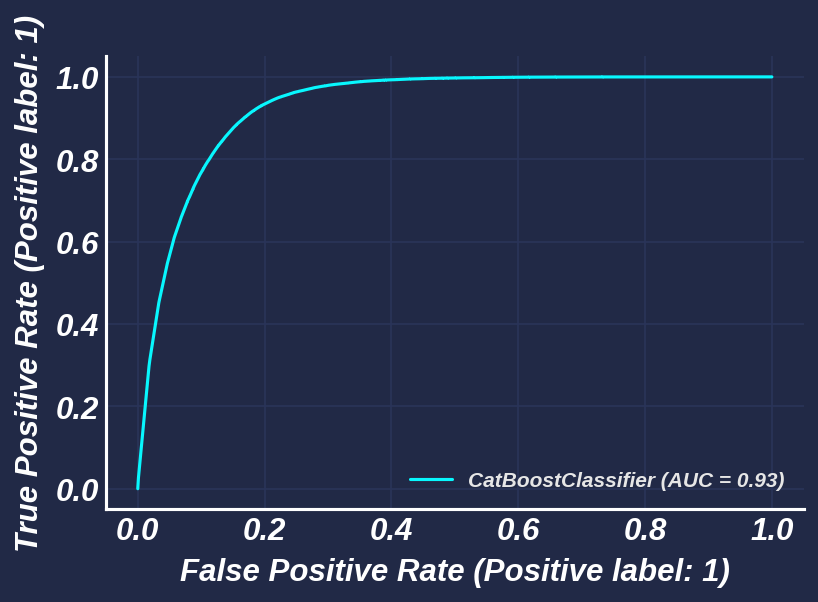

In [ ]:
# plot roc auc 

plot_roc_curve(cb_score, x_val, y_val)

In [ ]:
classification_report(y_val, cb_score.predict(x_val))

'              precision    recall  f1-score   support\n\n           0       0.92      0.93      0.93    350013\n           1       0.69      0.65      0.67     80797\n\n    accuracy                           0.88    430810\n   macro avg       0.81      0.79      0.80    430810\nweighted avg       0.88      0.88      0.88    430810\n'

(array([2.68793e+05, 2.48060e+04, 2.02460e+04, 1.77120e+04, 2.19570e+04,
        1.73020e+04, 1.30100e+04, 1.83880e+04, 2.85900e+04, 6.00000e+00]),
 array([3.35732641e-04, 9.78297078e-02, 1.95323683e-01, 2.92817658e-01,
        3.90311633e-01, 4.87805609e-01, 5.85299584e-01, 6.82793559e-01,
        7.80287534e-01, 8.77781509e-01, 9.75275484e-01]),
 <a list of 10 Patch objects>)

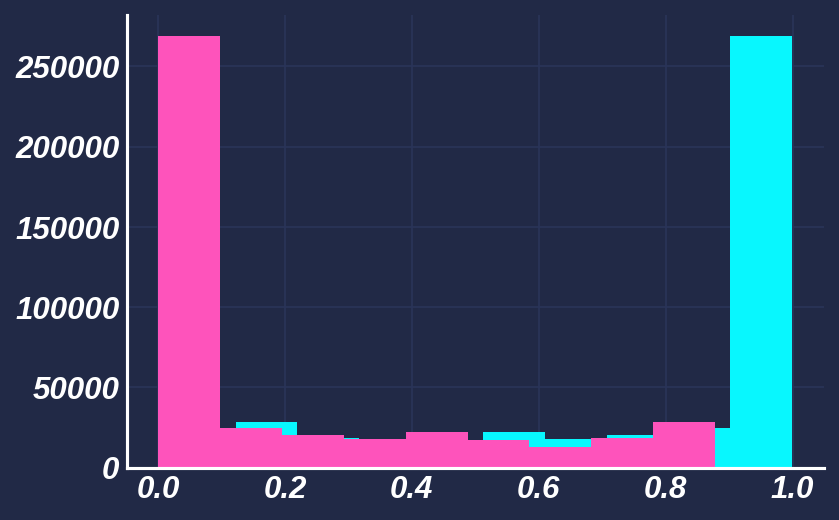

In [ ]:

# liat probability 

plt.hist(proba[:,0])
plt.hist(proba[:,1])

In [ ]:
# buat submission mengunkan catboost

In [ ]:
tester = test.copy()

In [ ]:
tester[cater] = tester[cater].astype("category")

In [ ]:
sub

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0
...,...,...
380122,fffe7e03c7eede2ad0a728ee516c4d342dd16107,0
380123,fffec230e6a1aa51ab37d0051ece42de611e71c6,0
380124,ffff0dcc1ab9812bf205b6d76e9d084053cd96f5,0
380125,ffff91ea6a09a0c8ea42bc6ae33df4b5e06283dc,0


In [ ]:
y_true = cb_score.predict_proba(tester)

In [ ]:
sub["CHURN"] = y_true[:,-1]

In [ ]:
sub

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0.001082
1,000055d41c8a62052dd426592e8a4a3342bf565d,0.082796
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0.000753
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0.393032
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0.372486
...,...,...
380122,fffe7e03c7eede2ad0a728ee516c4d342dd16107,0.000706
380123,fffec230e6a1aa51ab37d0051ece42de611e71c6,0.789424
380124,ffff0dcc1ab9812bf205b6d76e9d084053cd96f5,0.229212
380125,ffff91ea6a09a0c8ea42bc6ae33df4b5e06283dc,0.157878


In [ ]:
sub.to_csv("sub_last.csv", index=False)